# Modeling Homework
### Emma Rasmussen 
## Problem 1- Conservative Differential Equations: Accuracy and Fidelity 

#### Part a

We need to show that if $V\left(y\right)\:=\:\frac{y^2}{8}\left(-4A^2+\:\log^2\left(y^2\right)\right)$, and $\frac{d^2y}{dt^2}\:=\:-\frac{dV}{dy}$, that the solution is $y\left(t\right)\:=\:\text{exp}\left(-6\:\sin\left(t\right)\right)$. We also know that $y_0\:=1$  and $v_0\:=\frac{\:dy}{dt}|_{t\:=\:0}\:=\:-A$.

First, we will take $-\frac{dV}{dy}$. This will give us:

$\frac{d^2y}{dt^2}\:= -\frac{1}{4}y(-4A^2 + 2\log(y^2) + \log^2(y^2)) $

Then, we will simplify:

$\frac{d^2y}{dt^2}\:= y(A^2 - \log(y) + \log^2(y)) $

Now, let's plus in our given solution for t to see if it works:

$\frac{d^2y}{dt^2}\:= 6\sin(t)e^{-6\sin(t)}+36\cos^2(t)e^{-6\sin(t)}$

$y(A^2 - \log(y) + \log^2(y)) = e^{-6\sin(t)}(A^2-\log(e^{-6\sin(t)}) + \log^2(e^{-6\sin(t)})) = 36e^{-6\sin(t)} +6\sin(t)e^{-6\sin(t)} - 36\sin^2(t)e^{-6\sin(t)} $

Now, we have to do some clever stuff to simplify everything:

$36e^{-6\sin(t)} +6\sin(t)e^{-6\sin(t)} - 36\sin^2(t)e^{-6\sin(t)} = e^{-6\sin(t)}(36 + 6\sin(t) - 36\sin^2(t)) = e^{-6\sin(t)}(6\sin(t) + 36(1 - \sin^2(t))) = e^{-6\sin(t)}(6\sin(t) + 36\cos^2(t)) = 6\sin(t)e^{-6\sin(t)}+36\cos^2(t)e^{-6\sin(t)}$ 

They match! So the solution is indeed a solution. 

### Part b

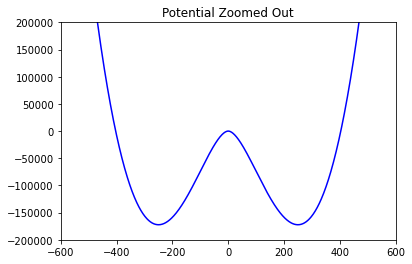

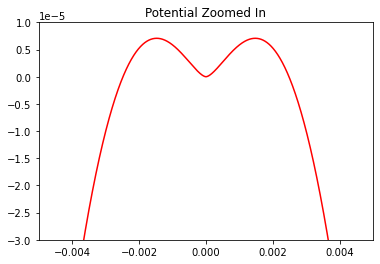

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# First, define all the equations and variables that we know
A = -6
y0 = 1
dydt0 = -A 

def V(y):
    v = y**2/8 * (-4*A**2 + np.log(y**2)**2)
    return v 

numpos= (3/2)*np.exp(A)
numneg = (3/2) *np.exp(-A)

ypos = np.linspace(-numpos,numpos, 1000)
yneg = np.linspace(-numneg,numneg, 1000)

plt.title("Potential Zoomed Out")
plt.plot(ypos, V(ypos),'r')
plt.plot(yneg, V(yneg),'b')
plt.xlim(-600,600)
plt.ylim(-200000, 200000)
plt.show()

plt.title("Potential Zoomed In")
plt.plot(ypos, V(ypos),'r')
plt.plot(yneg, V(yneg),'b')
plt.xlim(-.005, .005)
plt.ylim(-3*1e-5, 1*1e-5)
plt.show()

### Part c

In [8]:
# from scipy.integrate import solve_ivp

# def pot(t,y):
#     A = 6 
#     dydt = -y/4*(-4*A**2 + np.log(y**2)*(2 + np.log(y**2)))
#     return dydt

# def F(t):
#     F = np.exp(-6*np.sin(t))
#     return F

# t = np.linspace(0,4*np.pi,100)
# y0 = [1]

# soln = solve_ivp(pot,  [t[0], t[-1]], y0, t_eval=t, rtol = 1e-5)

# fig,ax = plt.subplots()
# ax.plot(soln.t, soln.y[0], label="Solver")
# ax.plot(t, F(t))
# plt.show()

<ipython-input-6-574b118efa04>:10: RuntimeWarning: invalid value encountered in log
  dydt = [y[1], y[0]*A**2 - (y[0]*np.log(y[0])*(1 + np.log(y[0])))]
c:\Users\rasmu\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


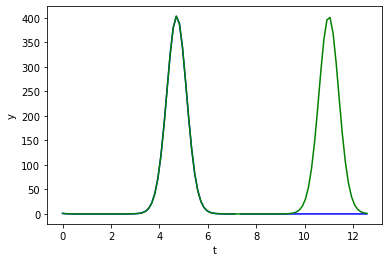

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

A = 6

def dV(y,t):
    A = 6 
    # dydt = [y[1], y[0]*A**2 - (1/4*y[0]*np.log(y[0]**2)*(2 + np.log(y[0]**2)))]
    dydt = [y[1], y[0]*A**2 - (y[0]*np.log(y[0])*(1 + np.log(y[0])))]
    return dydt

def F(t):
    F = np.exp(-6*np.sin(t))
    return F

t = np.linspace(0,4*np.pi,100)
y0 = [1,-A]

sol = odeint(dV, y0, t)

fig,ax = plt.subplots()
plt.plot(t, sol[:,0], 'b', label="Solver")
plt.plot(t, F(t), 'g', label='Analytical')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

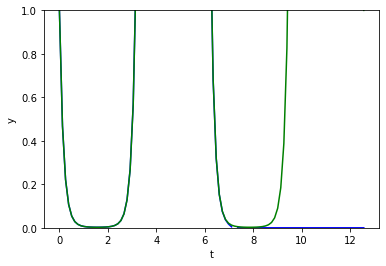

In [7]:
plt.plot(t, sol[:,0], 'b', label="Solver")
plt.plot(t, F(t), 'g', label='Analytical')
plt.xlabel('t')
plt.ylabel('y')
plt.ylim(0,1)
plt.show()

From the y range of 0 to 1, it actually almost looks like energy is conserved. It is conserved up until about 8, and then the solver's solution flatlines. 

Scipy.odeint uses lsoda from the FORTRAN library odepack. This library uses a solver called LSODE and other variations of it. LDOSE treats the matrix, which you define using a first order diffrential equation, as a dense or banded matrix. It then uses either Adam's methofs or Backward Differentiation foula methods to solse the linear system. There are eight other cariants of it, but that is the main jist of how it works. 

#### Part D

For this part, we need to show that $y(h)$ and $y(t + h)$ converge to the true solution as h approaches 0. We will start with a Taylor expansion for each function: 

$y(h)=y(0)+hy′(0)+ (h^2/2)y′′(0)+O(h^3)$

$y(t+h)=y(t)+hy′(t)+2h^2y′′(t)+O(h^3)$

Now, if we did a taylor expansion of the true solution of y(t+h), we would get the same thing at least to the third term, with the last order term still meaning all the other higher order terms. 

Now we will go through one time step and look at the error: 

$ϵ(h)=y_{exact}(h)−y(h)= 2h2y ′′(0)+O(h^3)−hv(h/2)$

There is an h in every term, so we can see that the exact solution and y(t + h) are the same when h approaches 0. We can also see that the error is acurate up to $h^2$ for one iteration. 



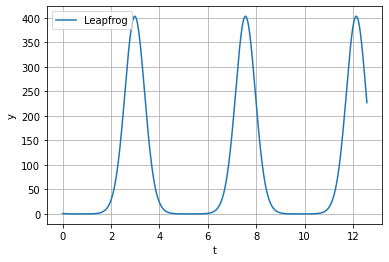

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def V(y, A):
    return (y**2 / 8) * (-4*A**2 + np.log(y**2)**2)

def dvdy(y, A, h=1e-5):
    return -(V(y + h, A) - V(y - h, A)) / (2 * h)

def leapfrog(y0, v0, A, T, h):
    num_steps = int(T / h)
    y = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    
    y[0] = y0 + h * (v0 + 0.5 * h * dvdy(y0, A))
    v[0] = v0 + 0.5 * h * dvdy(y0, A)
    
    for i in range(1, num_steps + 1):
        v[i] = v[i-1] + h * dvdy(y[i-1], A)
        y[i] = y[i-1] + h * v[i] 
    
    return y, v

y0 = 1
v0 = -6
A = 6
T = 4*np.pi
h = 0.01

yleap, vleap = leapfrog(y0, v0, A, T, h)

# Plot the results
t = np.linspace(0, T, len(yleap))
plt.plot(t, yleap, label='Leapfrog')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()